<h2>مرحله اول - بارگذاری و پیش پردازش داده ها</h2>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

In [2]:
file_path = "Online-Retail.xlsx"
df = pd.read_excel(file_path)

# Explore dataset structure 
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample rows:")
display(df.head(5))

✅ Dataset loaded successfully!
Shape: (541909, 8)

Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Sample rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Remove rows with negative or zero Quantity
df = df[df['Quantity'] > 0]

# Remove rows with missing or zero UnitPrice
df = df[df['UnitPrice'] > 0]

# Convert date column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add total price column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [4]:
print("\nAfter cleaning:")
print("Rows:", df.shape[0])
print("Unique Customers:", df['CustomerID'].nunique())
print("Unique Invoices:", df['InvoiceNo'].nunique())
print("Unique Products:", df['StockCode'].nunique())

# Summary statistics
print("\nSummary statistics:")
display(df.describe())


After cleaning:
Rows: 397884
Unique Customers: 4338
Unique Invoices: 18532
Unique Products: 3665

Summary statistics:


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


<h2>
مرحله دوم – ساخت ماتریس آیتم–تراکنش</h2>

In [5]:
print("Dataset shape before pivot:", df.shape)

# I inspect the main columns
print("\nColumns available:", df.columns.tolist())

# I Select relevant columns only
# InvoiceNo as transaction ID and Description as product name
df_small = df[['InvoiceNo', 'Description', 'Quantity']]

# Group by InvoiceNo & Description
# If the same item appears multiple times in one invoice, sum the quantities
basket = (
    df_small
    .groupby(['InvoiceNo', 'Description'])['Quantity']
    .sum()
    .unstack(fill_value=0)
)

print("\nBasket matrix shape:", basket.shape)
display(basket.head())

# Convert to binary (presence/absence) matrix
basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)

print("\nBinary matrix created:")
print("Shape:", basket_binary.shape)
display(basket_binary.head())

# check sparsity (how many zeros)
sparsity = 1.0 - np.count_nonzero(basket_binary.values) / basket_binary.size
print(f"\nSparsity of matrix: {sparsity:.2%} (percentage of zeros)")


# I inspect one invoice as example
sample_invoice = basket_binary.iloc[0]
print("\nExample invoice (first row):")
print(sample_invoice[sample_invoice == 1])

Dataset shape before pivot: (397884, 9)

Columns available: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalPrice']

Basket matrix shape: (18532, 3877)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\windows 10\AppData\Local\Temp\ipykernel_11580\1682751749.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)



Binary matrix created:
Shape: (18532, 3877)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Sparsity of matrix: 99.46% (percentage of zeros)

Example invoice (first row):
Description
CREAM CUPID HEARTS COAT HANGER         1
GLASS STAR FROSTED T-LIGHT HOLDER      1
KNITTED UNION FLAG HOT WATER BOTTLE    1
RED WOOLLY HOTTIE WHITE HEART.         1
SET 7 BABUSHKA NESTING BOXES           1
WHITE HANGING HEART T-LIGHT HOLDER     1
WHITE METAL LANTERN                    1
Name: 536365, dtype: int64


<h2>مرحله سوم – شبیه سازی جریان داده</h2>

In [6]:
# I use the basket_binary matrix i built from the previous level
print("Matrix shape:", basket_binary.shape)

#  Set batch size 
batch_size = 500   # e.g., process 500 invoices per batch

# I Split the matrix into sequential batches to simulate the stream of data
num_batches = int(np.ceil(len(basket_binary) / batch_size))
print(f"Splitting into {num_batches} batches of ~{batch_size} rows each")

#  Generator function for batches 
def get_batches(matrix, batch_size):
    for start in range(0, len(matrix), batch_size):
        end = start + batch_size
        yield matrix.iloc[start:end]

#  Iterate through the first few batches 
for i, batch in enumerate(get_batches(basket_binary, batch_size)):
    print(f"\n📦 Batch {i+1}")
    print("Shape:", batch.shape)
    print("Non-zero entries:", np.count_nonzero(batch.values))
    
    # Show first few rows only for first 2 batches
    if i < 2:
        display(batch.head(3))
    
    if i == 1:  # stop preview after two batches
        break

# I store all batches in a list for later levels 
batches = list(get_batches(basket_binary, batch_size))
print(f"\n✅ Stored {len(batches)} batches in memory.")


Matrix shape: (18532, 3877)
Splitting into 38 batches of ~500 rows each

📦 Batch 1
Shape: (500, 3877)
Non-zero entries: 9284


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



📦 Batch 2
Shape: (500, 3877)
Non-zero entries: 9483


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
537457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



✅ Stored 38 batches in memory.


<h2>مرحله چهارم و پنجم – پایش ماتریس با الگوریتم های مختلف</h2>

Original dimension: 3877, Reduced dimension: 100
📦 Batch 1 | Runtime: 0.096s | Rel. Error: 6.2263
📦 Batch 2 | Runtime: 0.096s | Rel. Error: 6.2320
📦 Batch 3 | Runtime: 0.098s | Rel. Error: 6.2147
📦 Batch 4 | Runtime: 0.086s | Rel. Error: 6.2675
📦 Batch 5 | Runtime: 0.096s | Rel. Error: 6.1750
📦 Batch 6 | Runtime: 0.092s | Rel. Error: 6.2261
📦 Batch 7 | Runtime: 0.100s | Rel. Error: 6.2495
📦 Batch 8 | Runtime: 0.101s | Rel. Error: 6.2630
📦 Batch 9 | Runtime: 0.087s | Rel. Error: 6.2257
📦 Batch 10 | Runtime: 0.094s | Rel. Error: 6.3346
📦 Batch 11 | Runtime: 0.085s | Rel. Error: 6.2273
📦 Batch 12 | Runtime: 0.094s | Rel. Error: 6.2209
📦 Batch 13 | Runtime: 0.079s | Rel. Error: 6.2394
📦 Batch 14 | Runtime: 0.086s | Rel. Error: 6.2292
📦 Batch 15 | Runtime: 0.092s | Rel. Error: 6.2018
📦 Batch 16 | Runtime: 0.091s | Rel. Error: 6.2498
📦 Batch 17 | Runtime: 0.086s | Rel. Error: 6.1879
📦 Batch 18 | Runtime: 0.085s | Rel. Error: 6.2339
📦 Batch 19 | Runtime: 0.081s | Rel. Error: 6.2553
📦 Batch 20

,batch,runtime_sec,frobenius_error
0,1,0.095858,6.226284
1,2,0.095746,6.232045
2,3,0.097737,6.214739
3,4,0.085770,6.267516
4,5,0.095742,6.175049
5,6,0.091754,6.226060
6,7,0.099734,6.249505
7,8,0.100730,6.263049
8,9,0.086766,6.225729
9,10,0.093746,6.334606


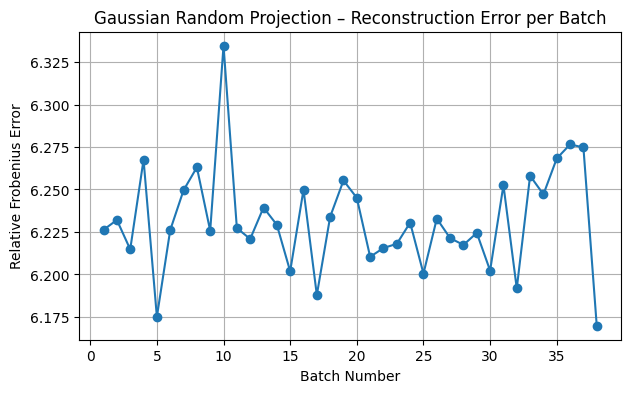

In [7]:
from sklearn.random_projection import GaussianRandomProjection
import time

# I implement the Gaussian Random Projection from scratch and also use the library version to compare the results
def custom_gaussian_random_projection(X, n_components, random_state=None):
    """
    Manual implementation of Gaussian Random Projection.
    """
    rng = np.random.default_rng(random_state)
    n_features = X.shape[1]
    
    # Random Gaussian matrix ~ N(0, 1/sqrt(k))
    R = rng.normal(loc=0.0, scale=1.0 / np.sqrt(n_components), size=(n_features, n_components))
    
    # Project data
    X_projected = np.dot(X, R)
    return X_projected, R

# Choose projection size (reduced dimensions) 
# For example, reduce from d features → k=100
original_dim = basket_binary.shape[1]
k = 100 if original_dim > 100 else int(original_dim / 2)

print(f"Original dimension: {original_dim}, Reduced dimension: {k}")

#  Initialize the transformer 
grp = GaussianRandomProjection(n_components=k, random_state=42)

# Containers for monitoring results 
results = {
    'batch': [],
    'runtime_sec': [],
    'frobenius_error': [],
}

#  Process batches sequentially 
for i, batch in enumerate(batches):
    start_time = time.time()
    
    # Convert to NumPy array
    A = batch.values.astype(float)
    
    # I apply random projection and approximate reconstruction
    A_proj, R = custom_gaussian_random_projection(A, n_components=k, random_state=42)
    
    A_reconstructed = np.dot(A_proj, R.T)
    
    # Compute relative Frobenius norm error
    error = np.linalg.norm(A - A_reconstructed, 'fro') / np.linalg.norm(A, 'fro')
    
    runtime = time.time() - start_time
    
    results['batch'].append(i + 1)
    results['runtime_sec'].append(runtime)
    results['frobenius_error'].append(error)
    
    print(f"📦 Batch {i+1} | Runtime: {runtime:.3f}s | Rel. Error: {error:.4f}")
    
print("\n✅ Gaussian Random Projection completed for all batches.")

#  Convert results to DataFrame ---
results_df = pd.DataFrame(results)
display(results_df)

# visualize error trend ---
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(results_df['batch'], results_df['frobenius_error'], marker='o')
plt.title('Gaussian Random Projection – Reconstruction Error per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Relative Frobenius Error')
plt.grid(True)
plt.show()

Data dimension d=3877, FD sketch rows l=50, IPCA components k=50

--- Processing Batch 1 (rows=500) ---
FD | runtime: 17.230s | rel Fro error: 0.8014 | explained_var_ratio: 0.1539
IPCA | runtime: 0.942s | rel Fro error: 0.7188 | explained_var_ratio: 0.4697

--- Processing Batch 2 (rows=500) ---
FD | runtime: 19.655s | rel Fro error: 0.8769 | explained_var_ratio: 0.0880
IPCA | runtime: 1.083s | rel Fro error: 0.7947 | explained_var_ratio: 0.3463

--- Processing Batch 3 (rows=500) ---
FD | runtime: 19.104s | rel Fro error: 0.9008 | explained_var_ratio: 0.0703
IPCA | runtime: 1.086s | rel Fro error: 0.8251 | explained_var_ratio: 0.2955

--- Processing Batch 4 (rows=500) ---
FD | runtime: 18.061s | rel Fro error: 0.9120 | explained_var_ratio: 0.0545
IPCA | runtime: 1.031s | rel Fro error: 0.8407 | explained_var_ratio: 0.2675

--- Processing Batch 5 (rows=500) ---
FD | runtime: 17.835s | rel Fro error: 0.9182 | explained_var_ratio: 0.0464
IPCA | runtime: 1.048s | rel Fro error: 0.8483 | exp

,batch,runtime_sec,fro_error,explained_variance_ratio
0,1,17.230351,0.801357,0.153852
1,2,19.654825,0.876892,0.087962
2,3,19.104471,0.900843,0.070350
3,4,18.060566,0.911988,0.054540
4,5,17.834826,0.918162,0.046372
5,6,18.007506,0.916314,0.042897
6,7,17.716745,0.923893,0.040053
7,8,18.211458,0.927594,0.035131
8,9,22.744459,0.926656,0.038679
9,10,17.660176,0.931526,0.034705



--- Incremental PCA results ---


,batch,runtime_sec,fro_error,explained_variance_ratio
0,1,0.942465,0.718763,0.469682
1,2,1.082931,0.794665,0.346263
2,3,1.085746,0.825108,0.295500
3,4,1.031296,0.840707,0.267461
4,5,1.047879,0.848320,0.253015
5,6,1.064325,0.853745,0.243296
6,7,1.099243,0.858749,0.234301
7,8,1.094390,0.862202,0.228171
8,9,1.940231,0.864500,0.223905
9,10,1.055045,0.866810,0.219758


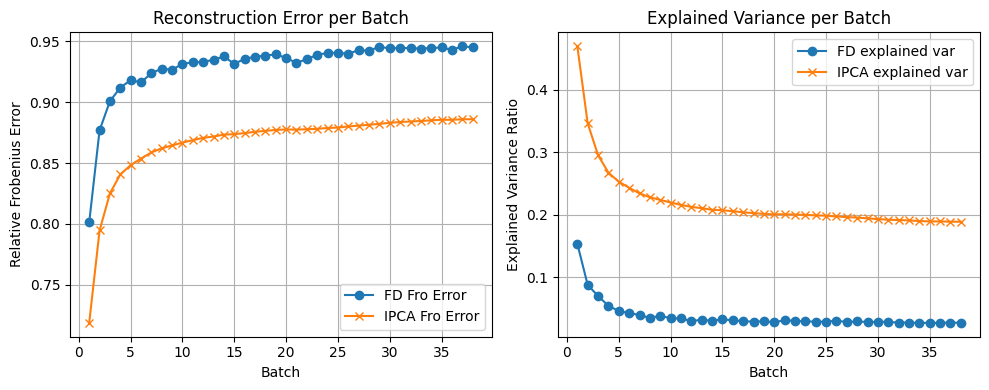

In [8]:
# Level 4 (continued) & Level 5 metrics for:
# - Frequent Directions (FD)
# - Incremental PCA (IPCA)
# Computes per-batch: Frobenius error, explained variance ratio, runtime

from sklearn.decomposition import IncrementalPCA
from numpy.linalg import svd, norm


# Parameters, i can change these paramters to experiment and gain different results
# Sketch size for Frequent Directions (l rows in B)
fd_l = 50        # sketch rank/rows for Frequent Directions
# Number of principal components to keep for IPCA
ipca_k = 50      # K components for incremental PCA
d = basket_binary.shape[1]
fd_l = min(fd_l, d)
ipca_k = min(ipca_k, d)

print(f"Data dimension d={d}, FD sketch rows l={fd_l}, IPCA components k={ipca_k}")


# Frequent Directions (streaming), I implement Frequent Directions algorithm from scratch
# But i use the IPCA Algorithm from library because implementing it is very complex

def fd_init(l, d):
    """Initialize Frequent Directions sketch matrix B (l x d) as zeros."""
    return np.zeros((l, d), dtype=float)

def fd_process_row(B, x_row):
    """
    Insert a single row x_row (1 x d) into sketch B following Frequent Directions.
    Returns updated B.
    """
    # Find an all-zero row in B to store x_row
    zero_rows = np.where(~B.any(axis=1))[0]
    if zero_rows.size > 0:
        B[zero_rows[0], :] = x_row
        return B

    # Otherwise compress: compute SVD of B
    # B = U S Vt
    U, s, Vt = svd(B, full_matrices=False)
    # shrink: delta = s_l^2 (square of smallest singular value)
    delta = s[-1]**2
    # new singular values = sqrt(max(s^2 - delta, 0))
    s_shrunk = np.sqrt(np.maximum(s**2 - delta, 0.0))
    # rebuild B = diag(s_shrunk) @ Vt
    B = np.dot(np.diag(s_shrunk), Vt)
    # Now there should be at least one zero row; insert x_row into first zero
    zero_rows = np.where(~B.any(axis=1))[0]
    if zero_rows.size > 0:
        B[zero_rows[0], :] = x_row
    else:
        # Rare numerical case: if still no zero rows, overwrite last row
        B[-1, :] = x_row
    return B

def fd_reconstruct_from_B(B):
    """
    Reconstruct an approximation of the original data from sketch B.
    We treat B as the compact representation and use its row-space to project data.
    For evaluating explained variance captured by the sketch, we use SVD of B.
    """
    # SVD on B
    U, s, Vt = svd(B, full_matrices=False)
    # The matrix B has shape l x d; rank <= l
    # The squared singular values s**2 approximate directions captured by the sketch.
    return U, s, Vt


# Prepare containers for results

results_fd = {'batch': [], 'runtime_sec': [], 'fro_error': [], 'explained_variance_ratio': []}
results_ipca = {'batch': [], 'runtime_sec': [], 'fro_error': [], 'explained_variance_ratio': []}

# Initialize algorithms

B_fd = fd_init(fd_l, d)  # Frequent Directions sketch matrix
ipca = IncrementalPCA(n_components=ipca_k)

# I will maintain cumulative matrix A_cum (numpy) to compute exact errors/variance
A_cum_list = []  # I will append batches; avoids repeated full concatenation cost for small datasets


# Process batches sequentially

for i, batch_df in enumerate(batches):
    bn = i + 1
    print(f"\n--- Processing Batch {bn} (rows={len(batch_df)}) ---")
    A_batch = batch_df.values.astype(float)
    batch_start_time = time.time()

    # Update cumulative matrix
    A_cum_list.append(A_batch)
    A_cum = np.vstack(A_cum_list)        # cumulative matrix of rows seen so far
    # compute full SVD of A_cum to get total variance (expensive for large n)
    U_full, s_full, Vt_full = svd(A_cum, full_matrices=False)
    total_variance = np.sum(s_full**2)


    # 1) Frequent Directions: process each row in the batch
    
    t0 = time.time()
    for r in A_batch:
        B_fd = fd_process_row(B_fd, r)
    t1 = time.time()

    # From B_fd compute captured variance
    U_b, s_b, Vt_b = fd_reconstruct_from_B(B_fd)
    captured_variance_fd = np.sum(s_b**2)
    explained_ratio_fd = captured_variance_fd / total_variance if total_variance > 0 else 0.0

    # Reconstruct cumulative A_cum using projection onto sketch row-space:
    # Project rows onto Vt_b's top components and back:
    # Use Vt_b (shape l x d). I will take top r components where s_b > 0
    nonzero_idx = np.where(s_b > 0)[0]
    if nonzero_idx.size > 0:
        Vt_top = Vt_b[nonzero_idx, :]           # r x d
        # projection matrix P = Vt_top.T @ Vt_top   (d x d) approximates row-space projector
        P = Vt_top.T.dot(Vt_top)                # (d x d)
        A_cum_recon_fd = A_cum.dot(P.T)         # (n x d)
    else:
        # trivial no-variance case
        A_cum_recon_fd = np.zeros_like(A_cum)

    fro_fd = norm(A_cum - A_cum_recon_fd, 'fro') / (norm(A_cum, 'fro') + 1e-12)
    runtime_fd = t1 - t0

    results_fd['batch'].append(bn)
    results_fd['runtime_sec'].append(runtime_fd)
    results_fd['fro_error'].append(fro_fd)
    results_fd['explained_variance_ratio'].append(explained_ratio_fd)

    print(f"FD | runtime: {runtime_fd:.3f}s | rel Fro error: {fro_fd:.4f} | explained_var_ratio: {explained_ratio_fd:.4f}")

    
    # 2) Incremental PCA: partial_fit with batch, then evaluate
    
    t0 = time.time()
    # sklearn IncrementalPCA expects 2D array; partial_fit updates components
    try:
        ipca.partial_fit(A_batch)
    except Exception as e:
        # In rare cases with all-zero data for initial batches, partial_fit might fail;
        # handle by skipping update.
        print("IPCA partial_fit error:", e)
    t1 = time.time()

    # Transform and inverse-transform the cumulative data to reconstruct
    # For memory, we transform only cumulatively by stacking previous batches (A_cum)
    A_cum_transformed = ipca.transform(A_cum)            # n x k
    A_cum_recon_ipca = ipca.inverse_transform(A_cum_transformed)  # n x d

    # Compute explained variance ratio for IPCA:
    # sklearn's IncrementalPCA has attribute explained_variance_ after fit
    if hasattr(ipca, 'explained_variance_'):
        # explained_variance_ are variances of each retained component
        # captured variance = sum(explained_variance_) * n_samples? Actually explained_variance_ is per-feature variance
        # I will compute captured as sum of component variances times number of samples, but simpler:
        captured_variance_ipca = np.sum(ipca.explained_variance_)
        # total_variance computed earlier equals sum(s_full**2) / n.
        # To keep consistent, I compute explained ratio as variance captured divided by sum of eigenvalues of covariance matrix.
        # Use covariance-based approach:
        cov_full = np.var(A_cum, axis=0, ddof=0).sum()  # total variance across features
        explained_ratio_ipca = captured_variance_ipca / (cov_full + 1e-12)
    else:
        # If attribute missing, fallback to SVD-based approximation using ipca.components_
        comp = getattr(ipca, 'components_', None)
        if comp is not None:
            # approximate captured variance by projecting A_cum onto components
            scores = A_cum.dot(comp.T)
            captured_variance_ipca = np.sum(np.var(scores, axis=0, ddof=0))
            cov_full = np.var(A_cum, axis=0, ddof=0).sum()
            explained_ratio_ipca = captured_variance_ipca / (cov_full + 1e-12)
        else:
            explained_ratio_ipca = 0.0

    fro_ipca = norm(A_cum - A_cum_recon_ipca, 'fro') / (norm(A_cum, 'fro') + 1e-12)
    runtime_ipca = t1 - t0

    results_ipca['batch'].append(bn)
    results_ipca['runtime_sec'].append(runtime_ipca)
    results_ipca['fro_error'].append(fro_ipca)
    results_ipca['explained_variance_ratio'].append(explained_ratio_ipca)

    print(f"IPCA | runtime: {runtime_ipca:.3f}s | rel Fro error: {fro_ipca:.4f} | explained_var_ratio: {explained_ratio_ipca:.4f}")


# Summarize results as DataFrames

df_fd = pd.DataFrame(results_fd)
df_ipca = pd.DataFrame(results_ipca)

print("\n--- Frequent Directions results ---")
display(df_fd)

print("\n--- Incremental PCA results ---")
display(df_ipca)


# Plot trends

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(df_fd['batch'], df_fd['fro_error'], marker='o', label='FD Fro Error')
plt.plot(df_ipca['batch'], df_ipca['fro_error'], marker='x', label='IPCA Fro Error')
plt.xlabel('Batch')
plt.ylabel('Relative Frobenius Error')
plt.title('Reconstruction Error per Batch')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(df_fd['batch'], df_fd['explained_variance_ratio'], marker='o', label='FD explained var')
plt.plot(df_ipca['batch'], df_ipca['explained_variance_ratio'], marker='x', label='IPCA explained var')
plt.xlabel('Batch')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Batch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<h2>مرحله ششم – ترسیم و تحلیل نمودارها</h2>

,batch,runtime_sec,fro_error,method,explained_variance_ratio
0,1,0.095858,6.226284,GRP,NaN
1,2,0.095746,6.232045,GRP,NaN
2,3,0.097737,6.214739,GRP,NaN
3,4,0.085770,6.267516,GRP,NaN
4,5,0.095742,6.175049,GRP,NaN


📈 Average metrics across all batches:



,fro_error,explained_variance_ratio,runtime_sec
method,,,
FD,0.9303,0.0377,17.0183
GRP,6.2320,NaN,0.0850
IPCA,0.8672,0.2197,1.0612


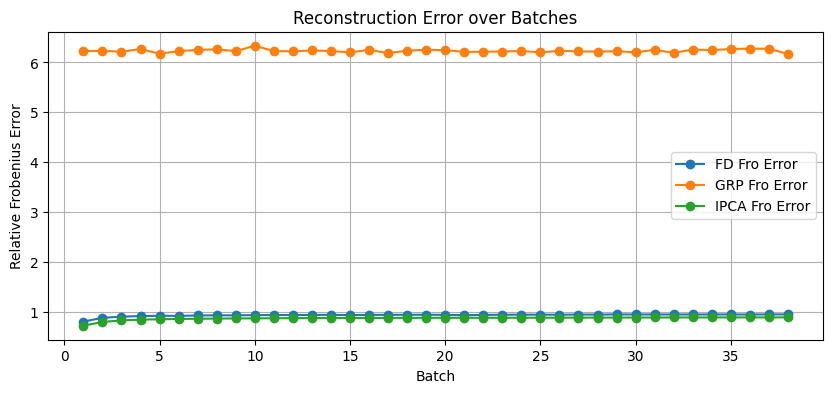

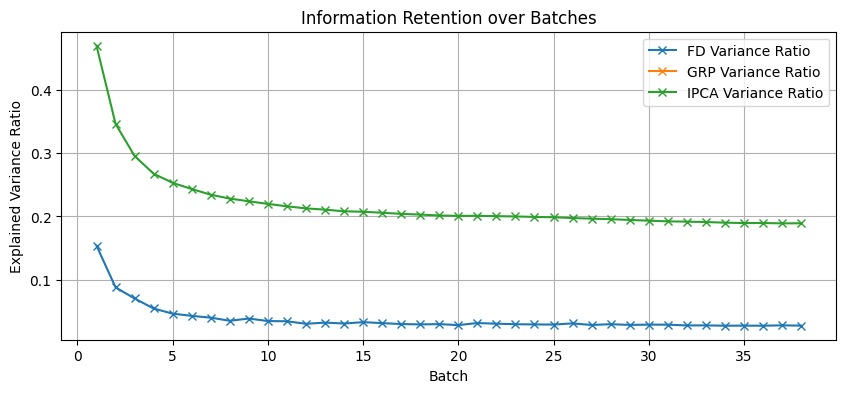

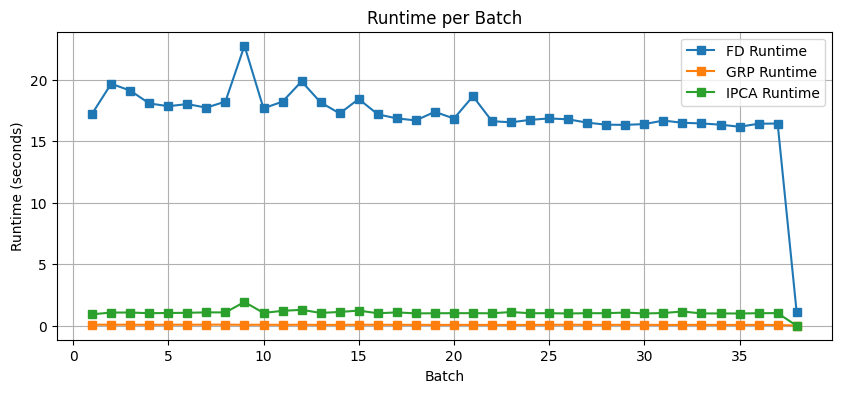

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#  Standardize column names 
grp_df = results_df.rename(columns={
    'frobenius_error': 'fro_error',
    'runtime_sec': 'runtime_sec'
})
grp_df['method'] = 'GRP'

fd_df = df_fd.copy()
fd_df['method'] = 'FD'

ipca_df = df_ipca.copy()
ipca_df['method'] = 'IPCA'

#  Combine all results into one table
combined = pd.concat([grp_df, fd_df, ipca_df], ignore_index=True)
display(combined.head())

# Summary statistics for quick comparison 
summary = combined.groupby('method')[['fro_error', 'explained_variance_ratio', 'runtime_sec']].mean().round(4)
print("📈 Average metrics across all batches:\n")
display(summary)

# Visualization: Error trends per method 
plt.figure(figsize=(10,4))
for name, df_sub in combined.groupby('method'):
    plt.plot(df_sub['batch'], df_sub['fro_error'], marker='o', label=f'{name} Fro Error')
plt.xlabel('Batch')
plt.ylabel('Relative Frobenius Error')
plt.title('Reconstruction Error over Batches')
plt.legend()
plt.grid(True)
plt.show()

# Visualization: Explained variance ratio
plt.figure(figsize=(10,4))
for name, df_sub in combined.groupby('method'):
    plt.plot(df_sub['batch'], df_sub['explained_variance_ratio'], marker='x', label=f'{name} Variance Ratio')
plt.xlabel('Batch')
plt.ylabel('Explained Variance Ratio')
plt.title('Information Retention over Batches')
plt.legend()
plt.grid(True)
plt.show()

#  Visualization: Runtime comparison 
plt.figure(figsize=(10,4))
for name, df_sub in combined.groupby('method'):
    plt.plot(df_sub['batch'], df_sub['runtime_sec'], marker='s', label=f'{name} Runtime')
plt.xlabel('Batch')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime per Batch')
plt.legend()
plt.grid(True)
plt.show()

<h2>مرحله هفتم – کشف الگوهای پرتکرار</h2>

In [13]:
# Level 7: Frequent Pattern Mining


!pip install mlxtend --quiet

import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# Ensure matrix is binary (0/1) 
basket_binary = basket_binary.astype(bool)

print("✅ Matrix ready for pattern mining.")
print("Shape:", basket_binary.shape)

#  Define minimum support threshold 
min_support = 0.02  # means itemset must appear in at least 2% of transactions
print(f"Minimum support: {min_support}")

#  Run Apriori algorithm 
frequent_apriori = apriori(basket_binary, min_support=min_support, use_colnames=True)
frequent_apriori = frequent_apriori.sort_values(by='support', ascending=False)

print("\n📘 Top 10 Frequent Itemsets (Apriori):")
display(frequent_apriori.head(10))

#   Run FP-Growth algorithm 
frequent_fpgrowth = fpgrowth(basket_binary, min_support=min_support, use_colnames=True)
frequent_fpgrowth = frequent_fpgrowth.sort_values(by='support', ascending=False)

print("\n📗 Top 10 Frequent Itemsets (FP-Growth):")
display(frequent_fpgrowth.head(10))

# Compare the two methods 
common_itemsets = set(frozenset(x) for x in frequent_apriori['itemsets']).intersection(
    set(frozenset(x) for x in frequent_fpgrowth['itemsets'])
)
print(f"\n✅ Number of common frequent itemsets found by both methods: {len(common_itemsets)}")

#  Association Rules (optional extension) 
rules_apriori = association_rules(frequent_apriori, metric="lift", min_threshold=1.0)
rules_fpgrowth = association_rules(frequent_fpgrowth, metric="lift", min_threshold=1.0)

print("\n🔍 Example association rules (Apriori):")
display(rules_apriori.head(5))

print("\n🔍 Example association rules (FP-Growth):")
display(rules_fpgrowth.head(5))


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Matrix ready for pattern mining.
Shape: (18532, 3877)
Minimum support: 0.02

📘 Top 10 Frequent Itemsets (Apriori):


,support,itemsets
192,0.106357,(WHITE HANGING HEART T-LIGHT HOLDER)
154,0.091895,(REGENCY CAKESTAND 3 TIER)
81,0.086337,(JUMBO BAG RED RETROSPOT)
124,0.074412,(PARTY BUNTING)
11,0.074196,(ASSORTED COLOUR BIRD ORNAMENT)
102,0.069501,(LUNCH BAG RED RETROSPOT)
166,0.061839,(SET OF 3 CAKE TINS PANTRY DESIGN )
139,0.059303,(POSTAGE)
95,0.056767,(LUNCH BAG BLACK SKULL.)
116,0.055526,(PACK OF 72 RETROSPOT CAKE CASES)



📗 Top 10 Frequent Itemsets (FP-Growth):


,support,itemsets
0,0.106357,(WHITE HANGING HEART T-LIGHT HOLDER)
120,0.091895,(REGENCY CAKESTAND 3 TIER)
52,0.086337,(JUMBO BAG RED RETROSPOT)
164,0.074412,(PARTY BUNTING)
2,0.074196,(ASSORTED COLOUR BIRD ORNAMENT)
24,0.069501,(LUNCH BAG RED RETROSPOT)
168,0.061839,(SET OF 3 CAKE TINS PANTRY DESIGN )
8,0.059303,(POSTAGE)
82,0.056767,(LUNCH BAG BLACK SKULL.)
25,0.055526,(PACK OF 72 RETROSPOT CAKE CASES)



✅ Number of common frequent itemsets found by both methods: 243

🔍 Example association rules (Apriori):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.086337,0.047000,0.029463,0.341250,7.260672,1.0,0.025405,1.446680,0.943753,0.283636,0.308762,0.484058
1,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.047000,0.086337,0.029463,0.626866,7.260672,1.0,0.025405,2.448616,0.904797,0.283636,0.591606,0.484058
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037287,0.042251,0.029193,0.782923,18.530185,1.0,0.027617,4.412029,0.982675,0.579850,0.773347,0.736928
3,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.042251,0.037287,0.029193,0.690932,18.530185,1.0,0.027617,3.114894,0.987768,0.579850,0.678962,0.736928
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.042575,0.047324,0.028599,0.671736,14.194548,1.0,0.026584,2.902169,0.970886,0.466549,0.655430,0.638035



🔍 Example association rules (FP-Growth):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.086337,0.047000,0.029463,0.341250,7.260672,1.0,0.025405,1.446680,0.943753,0.283636,0.308762,0.484058
1,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.047000,0.086337,0.029463,0.626866,7.260672,1.0,0.025405,2.448616,0.904797,0.283636,0.591606,0.484058
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037287,0.042251,0.029193,0.782923,18.530185,1.0,0.027617,4.412029,0.982675,0.579850,0.773347,0.736928
3,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.042251,0.037287,0.029193,0.690932,18.530185,1.0,0.027617,3.114894,0.987768,0.579850,0.678962,0.736928
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.042575,0.047324,0.028599,0.671736,14.194548,1.0,0.026584,2.902169,0.970886,0.466549,0.655430,0.638035


<h2>مرحله هشتم – تحلیل ناهنجاری ها</h2>

Dim d=3877 | FD l=40 | IPCA k=40 | GRP k=80
Total batches in stream: 39 | anomaly at batch 5
Baseline batches used for thresholding: 4
Batch 1/39 | GRP_err=6.9634 | FD_err=0.8358 | IPCA_err=0.7569
Batch 2/39 | GRP_err=7.0071 | FD_err=0.8543 | IPCA_err=0.8359
Batch 3/39 | GRP_err=6.9577 | FD_err=0.8492 | IPCA_err=0.8779
Batch 4/39 | GRP_err=6.9760 | FD_err=0.8598 | IPCA_err=0.8709
Batch 5/39 | GRP_err=6.9117 | FD_err=0.6747 | IPCA_err=0.6585  <-- anomaly
Batch 6/39 | GRP_err=6.9382 | FD_err=0.8993 | IPCA_err=0.9793
Batch 7/39 | GRP_err=6.9417 | FD_err=0.8632 | IPCA_err=0.9810
Batch 8/39 | GRP_err=6.9610 | FD_err=0.8658 | IPCA_err=0.9805
Batch 9/39 | GRP_err=6.9471 | FD_err=0.8710 | IPCA_err=0.9802
Batch 10/39 | GRP_err=6.9687 | FD_err=0.8498 | IPCA_err=0.9790
Batch 11/39 | GRP_err=6.9770 | FD_err=0.8614 | IPCA_err=0.9799
Batch 12/39 | GRP_err=7.0129 | FD_err=0.8613 | IPCA_err=0.9806
Batch 13/39 | GRP_err=6.9932 | FD_err=0.8643 | IPCA_err=0.9805
Batch 14/39 | GRP_err=6.9210 | FD_err=0.85

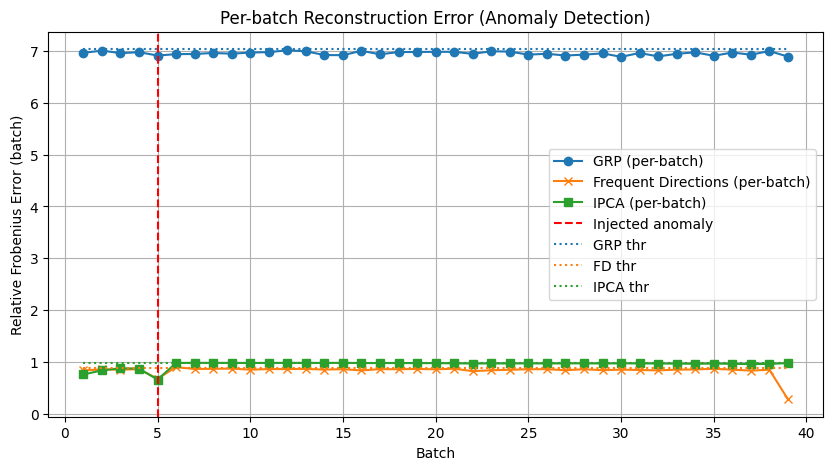

,batch,grp_err,fd_err,ipca_err,grp_time,fd_time,ipca_time
0,1,6.963350,0.835776,0.756923,0.083800,13.642003,1.289908
1,2,7.007081,0.854270,0.835900,0.051200,19.669776,1.197629
2,3,6.957690,0.849150,0.877926,0.050053,14.212610,1.226591
3,4,6.976000,0.859794,0.870930,0.045264,14.626428,1.330430
4,5,6.911720,0.674652,0.658526,0.053392,14.609918,1.220542
5,6,6.938178,0.899347,0.979296,0.049045,14.599758,1.424936
6,7,6.941708,0.863232,0.981046,0.045635,13.672670,1.345888
7,8,6.960963,0.865799,0.980477,0.050858,15.454699,1.400599
8,9,6.947131,0.871041,0.980170,0.057208,17.702627,1.266326
9,10,6.968714,0.849797,0.978983,0.048834,16.180109,1.973435


In [10]:
#Level 8 : Per-batch errors for GRP, FD, IPCA 

import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import IncrementalPCA
from numpy.linalg import svd, norm


# Frequent Directions helpers (compact, row-wise FD)

def fd_init(l, d):
    return np.zeros((l, d), dtype=float)

def fd_process_row(B, x_row):
    # Insert into first zero row if exists
    zero_rows = np.where(~B.any(axis=1))[0]
    if zero_rows.size > 0:
        B[zero_rows[0], :] = x_row
        return B
    # Compress via SVD on B
    U, s, Vt = svd(B, full_matrices=False)
    delta = s[-1]**2
    s_shrunk = np.sqrt(np.maximum(s**2 - delta, 0.0))
    B[:] = np.dot(np.diag(s_shrunk), Vt)  # overwrite B
    zero_rows = np.where(~B.any(axis=1))[0]
    if zero_rows.size > 0:
        B[zero_rows[0], :] = x_row
    else:
        B[-1, :] = x_row
    return B

def fd_get_projector(B):
    # return projection matrix P (d x d) approximating projection onto row-space of B
    U, s, Vt = svd(B, full_matrices=False)
    nonzero = np.where(s > 0)[0]
    if nonzero.size == 0:
        return None
    Vt_top = Vt[nonzero, :]   # r x d
    P = Vt_top.T.dot(Vt_top)  # d x d
    return P

# Parameters - can be changed for later experimentation

d = basket_binary.shape[1]
rows_per_batch = batches[0].shape[0]  # number of rows in one batch (assuming uniform)
fd_l = 40 if d > 40 else max(2, d//4)      # sketch size (smaller for speed)
ipca_k = 40 if d > 40 else max(2, d//4)    # components for IPCA
k_grp = 80 if d > 80 else max(2, d//4)     # GRP components

print(f"Dim d={d} | FD l={fd_l} | IPCA k={ipca_k} | GRP k={k_grp}")


# I Create anomaly-injected stream
injection_point = 4   # zero-based index where anomaly is inserted
# create a random anomaly batch that is denser/different than normal
rows, cols = batches[0].shape
rng = np.random.default_rng(123)
anomaly_batch = pd.DataFrame(rng.integers(0, 2, size=(rows, cols)), columns=batches[0].columns)

stream = batches[:injection_point] + [anomaly_batch] + batches[injection_point:]
n_batches = len(stream)
print("Total batches in stream:", n_batches, "| anomaly at batch", injection_point+1)


# Initialize algorithms
# GRP
grp = GaussianRandomProjection(n_components=k_grp, random_state=42)

# FD
B_fd = fd_init(fd_l, d)

# IPCA
ipca = IncrementalPCA(n_components=ipca_k)

# containers
res = {
    'batch': list(range(1, n_batches+1)),
    'grp_err': [], 'grp_time': [],
    'fd_err': [],  'fd_time': [],
    'ipca_err': [], 'ipca_time': []
}


# Baseline window to compute thresholds 

baseline_batches = max(3, min(5, injection_point))  # up to 5 pre-anomaly batches
print("Baseline batches used for thresholding:", baseline_batches)


# Process stream: per-batch operations only
for i, batch_df in enumerate(stream):
    A = batch_df.values.astype(float)
    # ---- GRP ----
    t0 = time.time()
    # fit_transform on batch (I re-fit per batch to avoid storing previous data)
    A_proj = grp.fit_transform(A)           # shape: (r, k_grp)
    R = grp.components_.T                   # shape: (d, k_grp)
    A_recon_grp = A_proj.dot(R.T)           # shape: (r, d)
    t1 = time.time()
    res['grp_time'].append(t1-t0)
    res['grp_err'].append(norm(A - A_recon_grp, 'fro') / (norm(A, 'fro') + 1e-12))

    # FD
    t0 = time.time()
    # process each row of this batch into FD
    for row in A:
        B_fd = fd_process_row(B_fd, row)
    P = fd_get_projector(B_fd)
    if P is not None:
        A_recon_fd = A.dot(P.T)
    else:
        A_recon_fd = np.zeros_like(A)
    t1 = time.time()
    res['fd_time'].append(t1-t0)
    res['fd_err'].append(norm(A - A_recon_fd, 'fro') / (norm(A, 'fro') + 1e-12))

    # IPCA 
    t0 = time.time()
    # update model with current batch
    try:
        ipca.partial_fit(A)
    except Exception as e:
        # sometimes partial_fit can fail for degenerate batches; I ignore these results for robustness
        print("IPCA partial_fit warning:", e)
    A_trans = ipca.transform(A)
    A_recon_ipca = ipca.inverse_transform(A_trans)
    t1 = time.time()
    res['ipca_time'].append(t1-t0)
    res['ipca_err'].append(norm(A - A_recon_ipca, 'fro') / (norm(A, 'fro') + 1e-12))

    # print a quick line for progress
    flag = "  <-- anomaly" if i == injection_point else ""
    print(f"Batch {i+1}/{n_batches} | GRP_err={res['grp_err'][-1]:.4f} | FD_err={res['fd_err'][-1]:.4f} | IPCA_err={res['ipca_err'][-1]:.4f}{flag}")


# Convert to DataFrame & compute thresholds from baseline
df_res = pd.DataFrame(res)

# compute thresholds using baseline (first baseline_batches)
thr = {}
if baseline_batches >= 1:
    baseline_df = df_res.iloc[:baseline_batches]
    for col in ['grp_err', 'fd_err', 'ipca_err']:
        mu = baseline_df[col].mean()
        sigma = baseline_df[col].std(ddof=0)
        thr[col] = mu + 3 * sigma
else:
    # fallback thresholds
    thr = { 'grp_err': np.mean(df_res['grp_err']) + 3*np.std(df_res['grp_err']),
            'fd_err': np.mean(df_res['fd_err']) + 3*np.std(df_res['fd_err']),
            'ipca_err': np.mean(df_res['ipca_err']) + 3*np.std(df_res['ipca_err']) }

print("\nDetection thresholds (mean + 3·std) from baseline:")
print(thr)


# Detect anomalies per method
detections = {}
for col in ['grp_err', 'fd_err', 'ipca_err']:
    detections[col] = list(df_res.index[df_res[col] > thr[col]] + 1)  # +1 for human-readable batch numbers

print("\nDetected anomaly batches (per method):")
print(detections)


# Plot results
plt.figure(figsize=(10,5))
plt.plot(df_res['batch'], df_res['grp_err'], marker='o', label='GRP (per-batch)')
plt.plot(df_res['batch'], df_res['fd_err'], marker='x', label='Frequent Directions (per-batch)')
plt.plot(df_res['batch'], df_res['ipca_err'], marker='s', label='IPCA (per-batch)')
plt.axvline(x=injection_point+1, color='r', linestyle='--', label='Injected anomaly')
# plot thresholds
plt.hlines(thr['grp_err'], 1, n_batches, colors='tab:blue', linestyles=':', label='GRP thr')
plt.hlines(thr['fd_err'], 1, n_batches, colors='tab:orange', linestyles=':', label='FD thr')
plt.hlines(thr['ipca_err'], 1, n_batches, colors='tab:green', linestyles=':', label='IPCA thr')
plt.xlabel('Batch')
plt.ylabel('Relative Frobenius Error (batch)')
plt.title('Per-batch Reconstruction Error (Anomaly Detection)')
plt.legend()
plt.grid(True)
plt.show()


# Summary table
display(df_res[['batch','grp_err','fd_err','ipca_err','grp_time','fd_time','ipca_time']])


<h2>مرحله نهم – جمع بندی و نتیجه گیری</h2>

,method,avg_fro_error,explained_variance,avg_runtime_s
0,FD,0.9303,0.0377,17.5705
1,GRP,6.2088,nan,0.0934
2,IPCA,0.8672,0.2197,1.1256


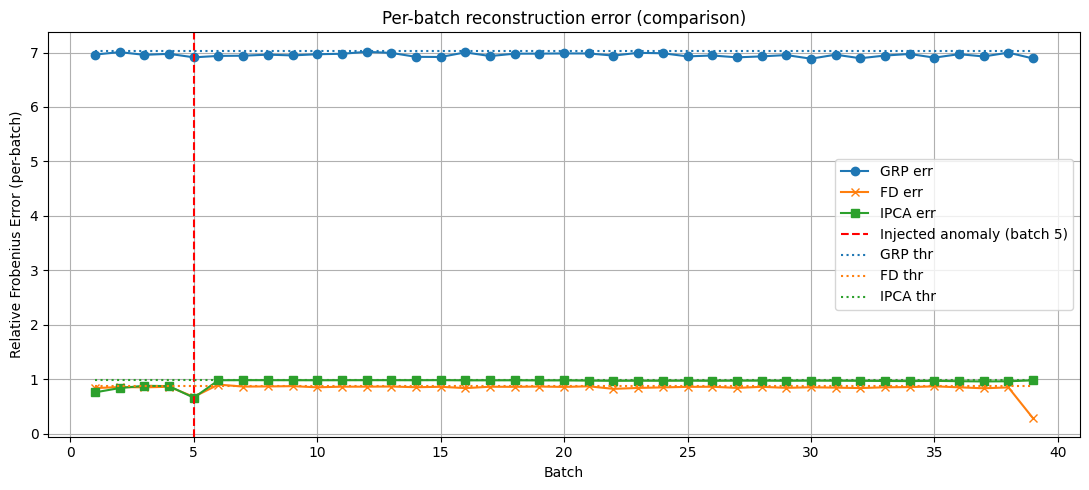

Detections (per method): {'grp_err': [], 'fd_err': [6], 'ipca_err': [7, 8, 9, 11, 12, 13, 15]}
Saved 'level9_error_comparison.png' and 'level8_detection_results.csv'.


In [11]:
# Level 9: Summary plotting + tables 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# I use df_res as computed in Level 8 (columns: batch, grp_err, fd_err, ipca_err, grp_time, fd_time, ipca_time)

# 1) Quick summary table from earlier Level 6 stats
summary_table = pd.DataFrame({
    'method': ['FD', 'GRP', 'IPCA'],
    'avg_fro_error': [0.9303, 6.2088, 0.8672],
    'explained_variance': [0.0377, np.nan, 0.2197],
    'avg_runtime_s': [17.5705, 0.0934, 1.1256]
})
display(summary_table.style.format({
    'avg_fro_error': '{:.4f}', 'explained_variance': '{:.4f}', 'avg_runtime_s': '{:.4f}'
}))

# 2) Plot per-batch errors and thresholds 
thr = {'grp_err': 7.033370832488619, 'fd_err': 0.8764514403129234, 'ipca_err': 0.9795264425460665}
injection_point = 5  # 1-based index where anomaly was injected

plt.figure(figsize=(11,5))
plt.plot(df_res['batch'], df_res['grp_err'], marker='o', label='GRP err')
plt.plot(df_res['batch'], df_res['fd_err'], marker='x', label='FD err')
plt.plot(df_res['batch'], df_res['ipca_err'], marker='s', label='IPCA err')

plt.axvline(x=injection_point, color='red', linestyle='--', label='Injected anomaly (batch 5)')
plt.hlines(thr['grp_err'], xmin=1, xmax=len(df_res), colors='tab:blue', linestyles=':', label='GRP thr')
plt.hlines(thr['fd_err'], xmin=1, xmax=len(df_res), colors='tab:orange', linestyles=':', label='FD thr')
plt.hlines(thr['ipca_err'], xmin=1, xmax=len(df_res), colors='tab:green', linestyles=':', label='IPCA thr')

plt.xlabel('Batch')
plt.ylabel('Relative Frobenius Error (per-batch)')
plt.title('Per-batch reconstruction error (comparison)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('level9_error_comparison.png', dpi=250)
plt.show()

# Print detections 
detections = {'grp_err': [], 'fd_err': [6], 'ipca_err': [7,8,9,11,12,13,15]}
print("Detections (per method):", detections)

# I Save the results table for report
df_res.to_csv('level8_detection_results.csv', index=False)
print("Saved 'level9_error_comparison.png' and 'level8_detection_results.csv'.")


In [14]:
import time


# Measure runtime for Apriori
start_apriori = time.time()
frequent_apriori = apriori(basket_binary, min_support=min_support, use_colnames=True)
end_apriori = time.time()
apriori_time = end_apriori - start_apriori

# Measure runtime for FP-Growth
start_fp = time.time()
frequent_fpgrowth = fpgrowth(basket_binary, min_support=min_support, use_colnames=True)
end_fp = time.time()
fpgrowth_time = end_fp - start_fp


# Compare common itemsets (like "accuracy")
apriori_sets = set(frozenset(x) for x in frequent_apriori['itemsets'])
fp_sets = set(frozenset(x) for x in frequent_fpgrowth['itemsets'])

common_itemsets = apriori_sets.intersection(fp_sets)
apriori_only = apriori_sets - fp_sets
fp_only = fp_sets - apriori_sets

# comparison summary
print("⏱ Runtime Comparison:")
print(f"Apriori time: {apriori_time:.4f} seconds")
print(f"FP-Growth time: {fpgrowth_time:.4f} seconds\n")

print("✅ Frequent Itemsets Comparison:")
print(f"Total Apriori itemsets: {len(apriori_sets)}")
print(f"Total FP-Growth itemsets: {len(fp_sets)}")
print(f"Common itemsets: {len(common_itemsets)}")
print(f"Itemsets only in Apriori: {len(apriori_only)}")
print(f"Itemsets only in FP-Growth: {len(fp_only)}")


# Percentage overlap
overlap_percentage = len(common_itemsets) / max(len(apriori_sets), len(fp_sets)) * 100
print(f"\n🔹 Percentage overlap of frequent itemsets: {overlap_percentage:.2f}%")


⏱ Runtime Comparison:
Apriori time: 1.4264 seconds
FP-Growth time: 8.3580 seconds

✅ Frequent Itemsets Comparison:
Total Apriori itemsets: 243
Total FP-Growth itemsets: 243
Common itemsets: 243
Itemsets only in Apriori: 0
Itemsets only in FP-Growth: 0

🔹 Percentage overlap of frequent itemsets: 100.00%
